In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
type(iris_dataset)

sklearn.utils.Bunch

In [ ]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
type(iris_dataset['data'])

numpy.ndarray

In [ ]:
iris_dataset['target'].shape

(150,)

In [ ]:
iris_dataset['data'].shape

(150, 4)

In [ ]:
iris_dataset['data'].shape

(150, 4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
y_train.shape

(112,)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
y_test.shape

(38,)

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [ ]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


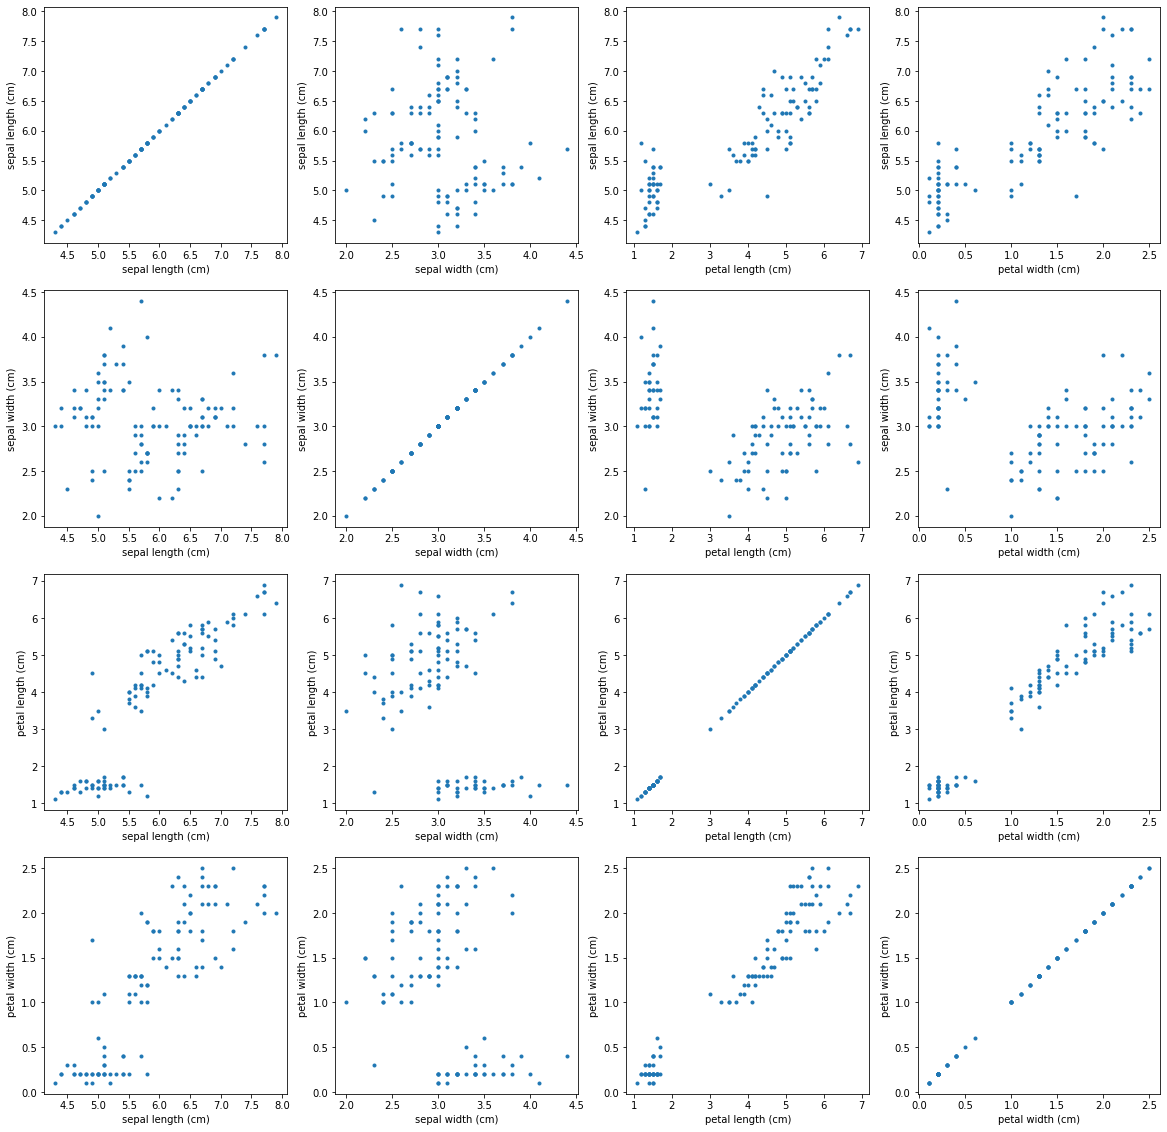

In [ ]:
n = iris_dataframe.shape[1]
k = 0
plt.figure(figsize=(20,20))
for i in range(n):
  for j in range(n):
    k += 1
    plt.subplot(n, n, k)
    plt.plot(iris_dataframe.iloc[:,j], iris_dataframe.iloc[:,i], marker='o', ls='', ms=3)
    plt.xlabel(iris_dataset['feature_names'][j])
    plt.ylabel(iris_dataset['feature_names'][i])
plt.show()

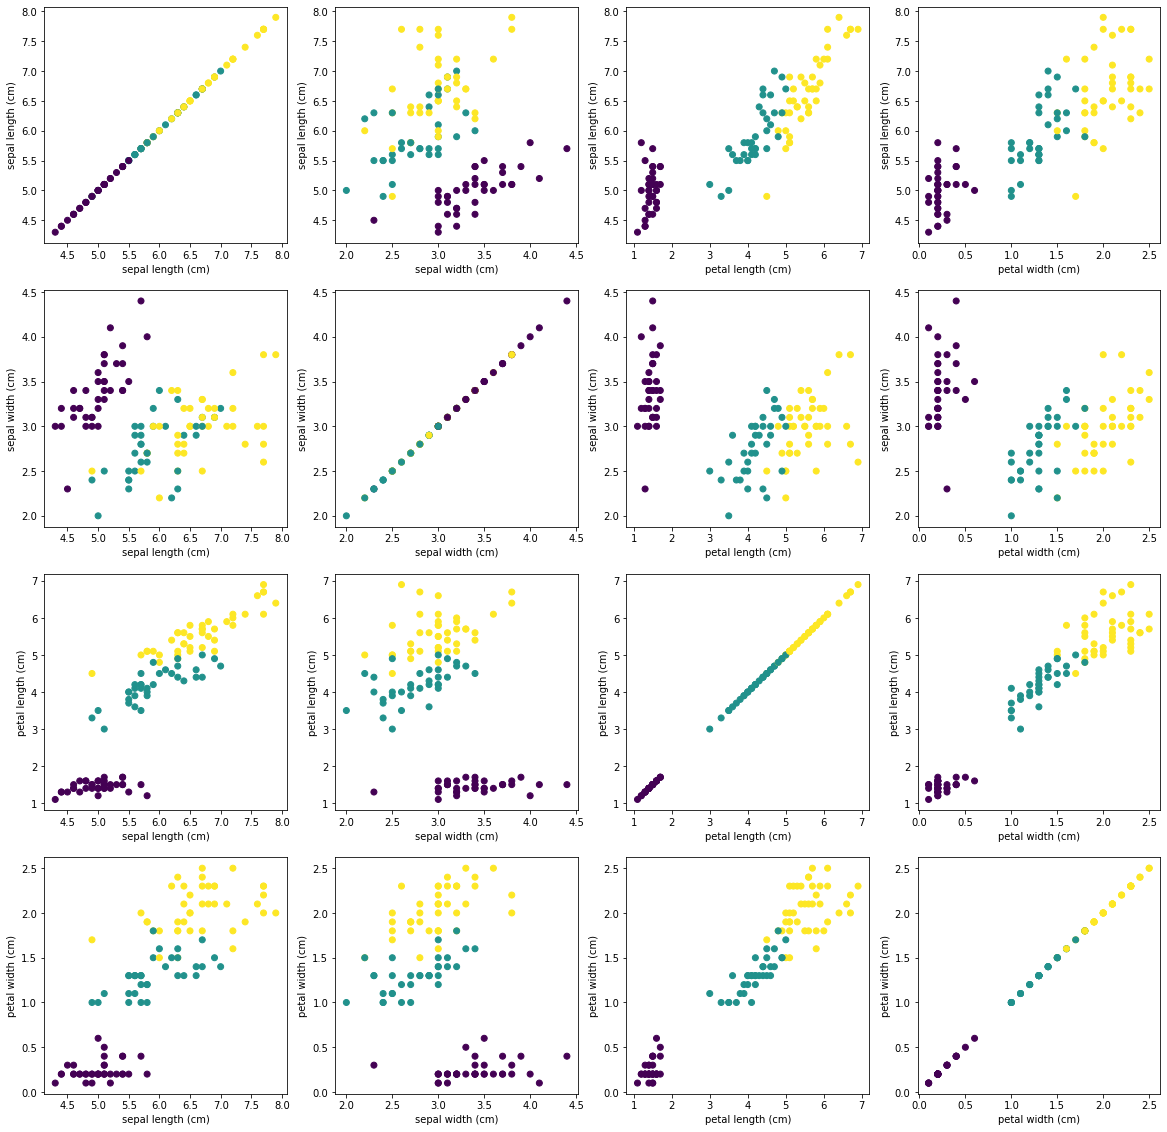

In [ ]:
n = iris_dataframe.shape[1]
k = 0
plt.figure(figsize=(20,20))
for i in range(n):
  for j in range(n):
    k += 1
    plt.subplot(n, n, k)
    plt.scatter(iris_dataframe.iloc[:,j], iris_dataframe.iloc[:,i], marker='o', c=y_train)
    plt.xlabel(iris_dataset['feature_names'][j])
    plt.ylabel(iris_dataset['feature_names'][i])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f193353a550>,
      dtype=object)

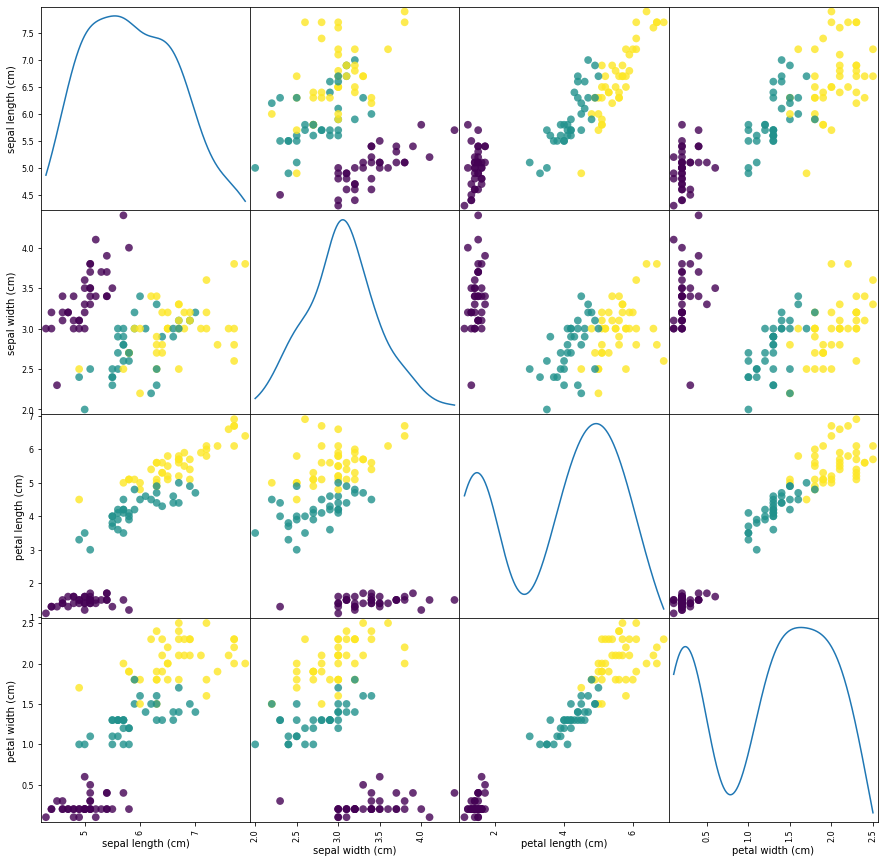

In [ ]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', s=60, alpha=.8, diagonal='kde')

k_Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
X_new = np.array([[5, 5, 5, 6]])

In [ ]:
X_new

array([[5, 5, 5, 6]])

In [ ]:
prediction = knn.predict(X_new)

In [ ]:
print("Prediction:", prediction)

Prediction: [2]


In [ ]:
print(iris_dataset['target_names'][2])

virginica


In [ ]:
y_pred = knn.predict(X_test)

ValueError: ignored

Other algorithms

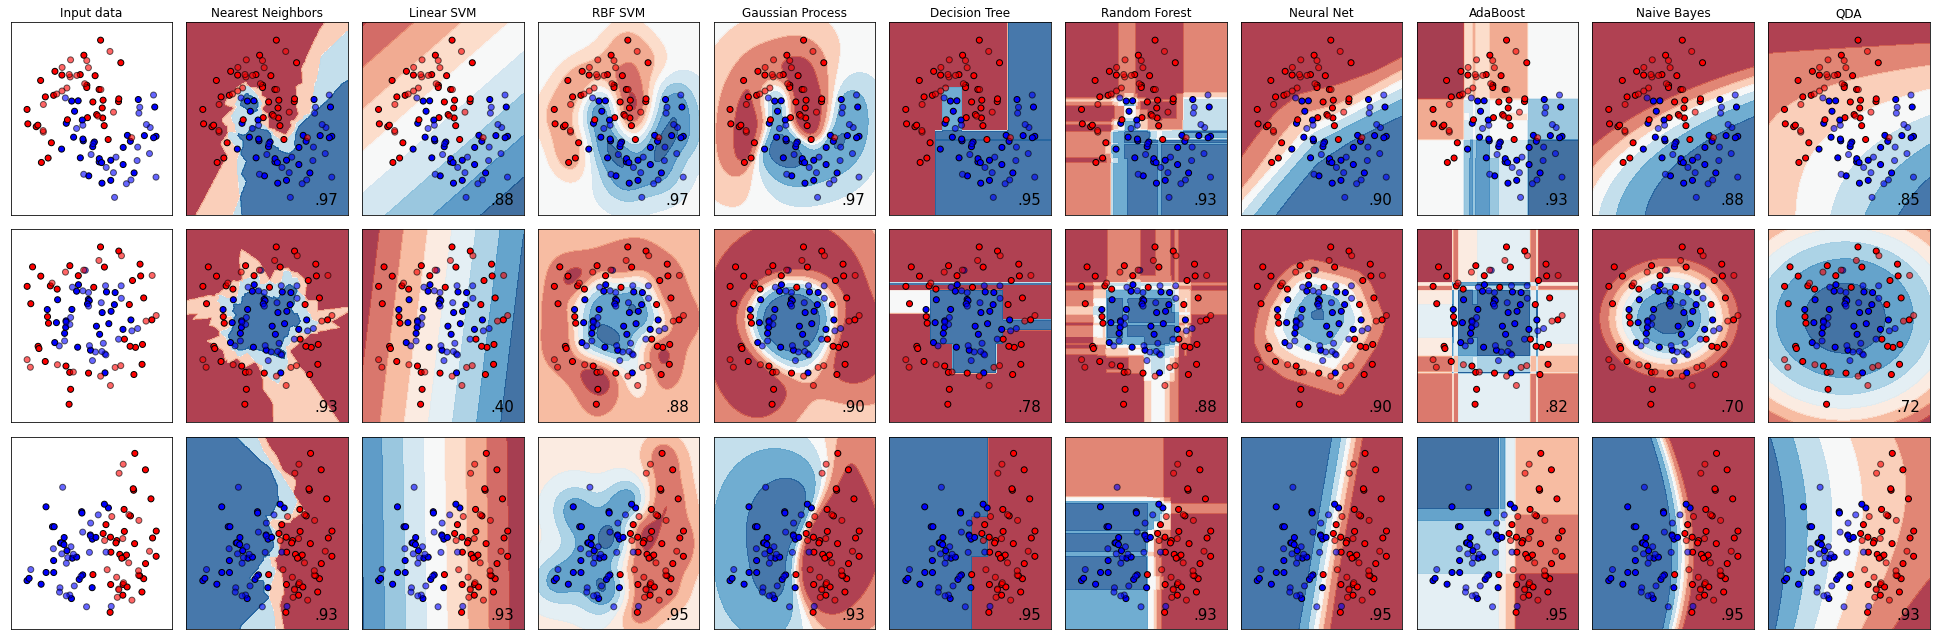

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
url = 'https://raw.githubusercontent.com/nosivads/data/main/gapminder-life-expectancy.csv'

In [ ]:
df = pd.read_csv(url, index_col="Life expectancy")

In [ ]:
df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,27.81,...,40.53,40.98,41.46,41.96,42.51,43.11,43.75,44.45,45.21,46.02,46.87,47.74,48.62,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.00,50.1,50.40,51.0,51.40,51.80,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,72.71,72.96,73.14,73.25,73.30,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.20,74.7,75.10,75.5,75.70,75.90,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,67.18,68.04,68.75,69.33,69.81,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.00,73.3,73.50,73.8,73.90,74.40,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.2,70.2,70.2,70.5,70.5,70.6,70.7,70.8,71.0,71.40,71.7,71.70,71.7,71.70,71.80,72.0,72.2,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.7,81.8,81.9,82.2,82.3,82.6,82.8,83.1,83.3,83.50,83.7,83.90,84.1,84.20,84.10,84.3,84.4,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,48.06,49.08,50.11,51.13,52.13,53.09,54.02,54.89,55.69,56.40,57.04,57.60,58.08,58.5,58.9,59.3,59.6,59.7,60.3,60.7,61.1,61.5,62.00,62.4,62.80,63.3,63.70,64.20,64.6,65.0,65.2,65.7,66.2,66.6,66.6,66.7,67.1,67.1,66.0,64.92
Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,57.36,57.57,57.66,57.62,57.45,57.14,56.71,56.17,55.54,54.85,54.09,53.33,52.59,51.9,50.7,49.6,48.6,47.7,46.9,46.3,45.9,45.4,45.00,44.8,44.90,45.1,45.30,46.30,47.1,47.9,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.

In [ ]:
df.loc['Zimbabwe', '1803':'1810']

1803    33.7
1804    33.7
1805    33.7
1806    33.7
1807    33.7
1808    33.7
1809    33.7
1810    33.7
Name: Zimbabwe, dtype: float64

In [ ]:
x_data = list(range(1950, 2000+1))

In [ ]:
x_data

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000]

In [ ]:
y_data = df.loc['Germany', '1950':'2000']
y_data

1950    66.91
1951    67.08
1952    67.40
1953    67.70
1954    68.00
1955    68.28
1956    68.57
1957    68.49
1958    69.23
1959    69.34
1960    69.26
1961    69.85
1962    70.01
1963    70.10
1964    70.66
1965    70.65
1966    70.77
1967    70.99
1968    70.64
1969    70.48
1970    70.72
1971    70.94
1972    71.16
1973    71.41
1974    71.71
1975    71.56
1976    72.02
1977    72.63
1978    72.60
1979    72.96
1980    73.14
1981    73.37
1982    73.69
1983    73.97
1984    74.44
1985    74.55
1986    74.75
1987    75.15
1988    75.33
1989    75.51
1990    75.40
1991    75.60
1992    76.00
1993    76.10
1994    76.40
1995    76.60
1996    76.90
1997    77.30
1998    77.60
1999    77.80
2000    78.10
Name: Germany, dtype: float64

In [ ]:
def make_graph(x_data, y_data, x_label, y_label):
  plt.figure(figsize=(12,8))
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.scatter(x_data, y_data, marker='x', color='red', label='original data')
  plt.grid()
  plt.legend()
  plt.show()

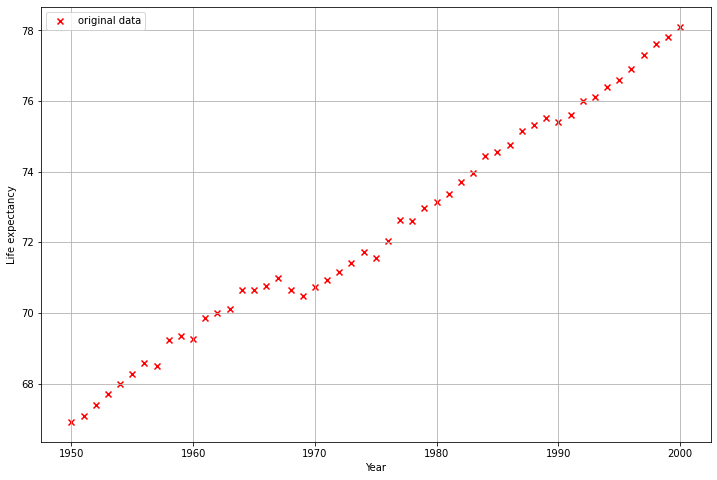

In [ ]:
make_graph(x_data, y_data, 'Year', 'Life expectancy')

In [ ]:
import sklearn.linear_model as skl_lin
import sklearn.metrics as skl_metrics

In [ ]:
type(x_data)

list

In [ ]:
type(y_data)

pandas.core.series.Series

In [ ]:
x_data_arr = np.array(x_data).reshape(-1, 1)

In [ ]:
y_data_arr = np.array(y_data).reshape(-1, 1)

In [ ]:
y_data_arr

array([[66.91],
       [67.08],
       [67.4 ],
       [67.7 ],
       [68.  ],
       [68.28],
       [68.57],
       [68.49],
       [69.23],
       [69.34],
       [69.26],
       [69.85],
       [70.01],
       [70.1 ],
       [70.66],
       [70.65],
       [70.77],
       [70.99],
       [70.64],
       [70.48],
       [70.72],
       [70.94],
       [71.16],
       [71.41],
       [71.71],
       [71.56],
       [72.02],
       [72.63],
       [72.6 ],
       [72.96],
       [73.14],
       [73.37],
       [73.69],
       [73.97],
       [74.44],
       [74.55],
       [74.75],
       [75.15],
       [75.33],
       [75.51],
       [75.4 ],
       [75.6 ],
       [76.  ],
       [76.1 ],
       [76.4 ],
       [76.6 ],
       [76.9 ],
       [77.3 ],
       [77.6 ],
       [77.8 ],
       [78.1 ]])

In [ ]:
regression = skl_lin.LinearRegression().fit(x_data_arr, y_data_arr)

In [ ]:
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
skl_c = regression.intercept_[0]

In [ ]:
skl_c

-346.7849095022625

In [ ]:
skl_m = regression.coef_[0][0]

In [ ]:
skl_m

0.2122199095022625

In [ ]:
##plot straight line
def make_linear(x_data, m, c):
    linear_data = []
    for x in x_data:
        y = m * x + c
        #add the result to the linear_data list
        linear_data.append(y)
    return(linear_data)

In [ ]:
linear_data = make_linear(x_data, skl_m, skl_c)

In [ ]:
linear_data

[67.04391402714936,
 67.25613393665162,
 67.46835384615389,
 67.68057375565616,
 67.89279366515842,
 68.10501357466069,
 68.31723348416295,
 68.52945339366516,
 68.74167330316743,
 68.9538932126697,
 69.16611312217196,
 69.37833303167423,
 69.5905529411765,
 69.80277285067876,
 70.01499276018103,
 70.2272126696833,
 70.43943257918556,
 70.65165248868783,
 70.8638723981901,
 71.07609230769236,
 71.28831221719463,
 71.50053212669684,
 71.7127520361991,
 71.92497194570137,
 72.13719185520364,
 72.3494117647059,
 72.56163167420817,
 72.77385158371044,
 72.9860714932127,
 73.19829140271497,
 73.41051131221724,
 73.6227312217195,
 73.83495113122177,
 74.04717104072404,
 74.2593909502263,
 74.47161085972851,
 74.68383076923078,
 74.89605067873305,
 75.10827058823531,
 75.32049049773758,
 75.53271040723985,
 75.74493031674211,
 75.95715022624438,
 76.16937013574665,
 76.38159004524891,
 76.59380995475118,
 76.80602986425345,
 77.01824977375571,
 77.23046968325798,
 77.44268959276019,
 77.65490

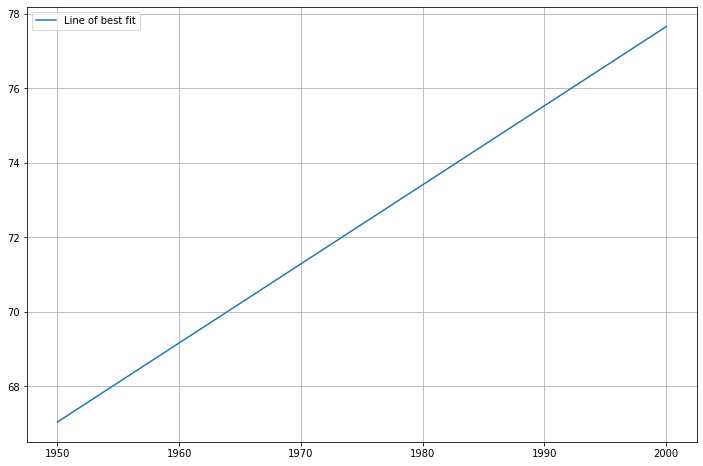

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x_data, linear_data, label="Line of best fit")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def make_graph2(x_data, y_data, linear_data, x_label, y_label):
    plt.figure(figsize=(12,8))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data, marker='x', color='red', label="Original Data")
    plt.plot(x_data, linear_data, label="Line of best fit")
    plt.grid()
    plt.legend()
    plt.show()

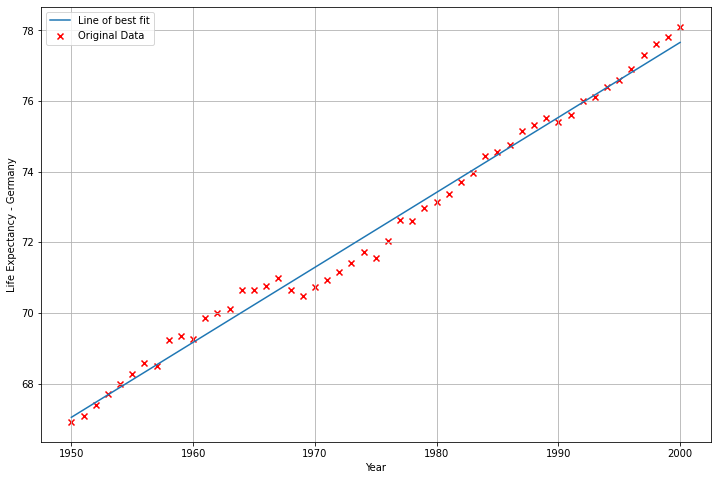

In [ ]:
make_graph2(x_data, y_data, linear_data, 'Year', 'Life Expectancy - Germany')

China

In [ ]:
x_data = list(range(1960, 2001))

In [ ]:
x_data

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000]

In [ ]:
life_expectancy = df.loc['China', '1960':'2000']

In [ ]:
life_expectancy

1960    30.53
1961    32.95
1962    43.29
1963    50.64
1964    52.00
1965    54.28
1966    55.37
1967    56.90
1968    57.87
1969    59.38
1970    61.00
1971    62.04
1972    61.36
1973    60.97
1974    60.63
1975    60.78
1976    60.46
1977    61.94
1978    62.15
1979    62.95
1980    63.92
1981    64.20
1982    65.28
1983    65.49
1984    65.68
1985    65.87
1986    66.05
1987    66.23
1988    66.39
1989    66.56
1990    66.70
1991    67.00
1992    67.20
1993    67.50
1994    67.90
1995    68.40
1996    68.80
1997    69.10
1998    69.40
1999    69.60
2000    69.80
Name: China, dtype: float64

In [ ]:
x_data_arr = np.array(x_data).reshape(-1, 1)
life_exp_arr = np.array(life_expectancy).reshape(-1, 1)

regression = skl_lin.LinearRegression().fit(x_data_arr, life_exp_arr)

skl_m = regression.coef_[0][0]
skl_c = regression.intercept_[0]

In [ ]:
skl_m

0.6144425087108016

In [ ]:
skl_c

-1155.2654355400703

In [ ]:
linear_data = regression.predict(x_data_arr)

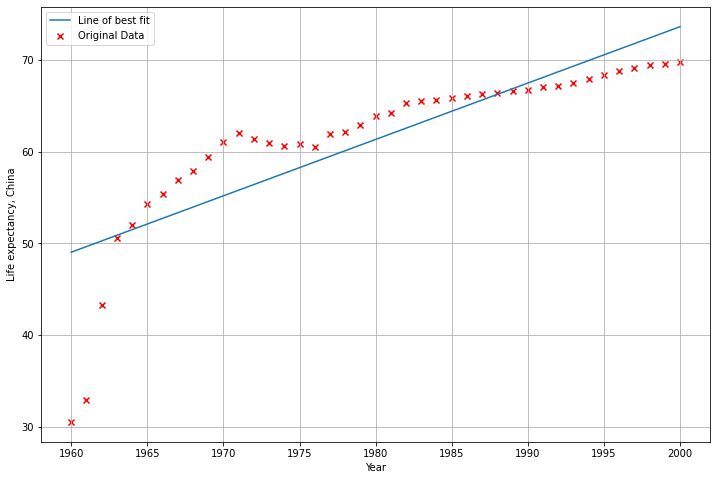

In [ ]:
make_graph2(x_data_arr, life_exp_arr, linear_data, 'Year', 'Life expectancy, China')

Polynomial regression

In [ ]:
import sklearn.preprocessing as skl_pre
polynomial_features = skl_pre.PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x_data_arr)